# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [3]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows= 30000)
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29940 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog license, including data on the dog's description, vaccination, and location
- 'Owner Zip Code': is the zip code of the dog's owner
- 'Animal Name': is the dog's name
- 'Animal Gender': is the dog's gender
- 'Primary Breed': is the dog's primary breed
- 'Secondary Breed': is the dog's secondary breed
- 'Animal Dominant Color': is the dog's primary color
- 'Animal Secondary Color': is the dog's secondary color
- 'Animal Third Color': is the dog's other color
- 'Animal Birth': is the date the dog was born
- 'Spayed or Neut': describes if the dog was spayed or neutered
- 'Guard or Trained': describes if the dog's professional status, if any
- 'Vaccinated': is whether the dog was vaccinated or not
- 'Application Date': is the applciation date of the license
- 'License Issued Date': is when the license was issued
- 'License Expired Date': is when the license will expire

In [5]:
df.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20


# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

- How many professional dogs are there? Does this differ by gender? by breed?
- How many dogs are spayed or neutered? Does this differ by breed?
- How long does it take for a license to be issued?
- What is the most popular dog by ZIP code?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

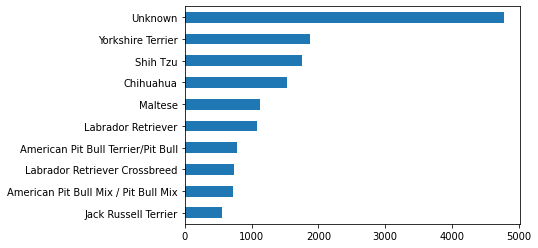

In [6]:
df['Primary Breed'].value_counts().head(10).sort_values().plot(kind = 'barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

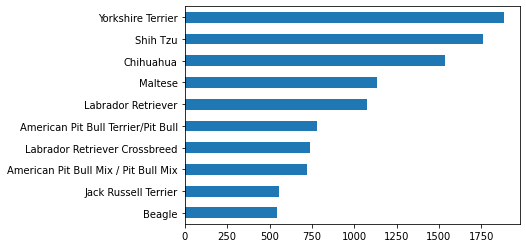

In [7]:
df_known = df[df['Primary Breed'] != 'Unknown']
df_known['Primary Breed'].value_counts().head(10).sort_values().plot(kind = 'barh')

## What are the most popular dog names?

<AxesSubplot:>

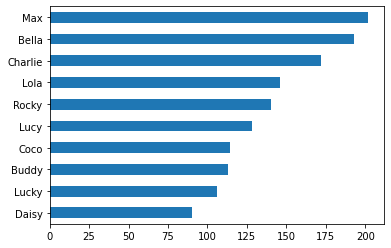

In [8]:
# df_known[~(df_known['Animal Name'].str.contains('unknown', case = False))] <- alternatively, use the ~ method when you have more than 1 thing you want to exclude

df_known = df[(df['Animal Name'] != 'Unknown') & (df['Animal Name'] != "UNKNOWN")]

df_known['Animal Name'].value_counts().head(10).sort_values().plot(kind = 'barh')

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [9]:
#assuming all subsequent questions should exclude unknown information

df_known[(df_known['Animal Name'] == 'Swathi')]
maxwell = df_known[(df_known['Animal Name'] == 'Max') | (df_known['Animal Name'] == 'Maxwell')]
maxwell['Animal Name'].count()

213

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [10]:
((df_known['Guard or Trained'].value_counts(normalize = True)*100)['Yes'])

0.08576762020079713

## What are the actual numbers?

In [11]:
df_known['Guard or Trained'].value_counts()

No     19804
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [12]:
df_known['Guard or Trained'].count()

19821

In [14]:
df_known['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

In [15]:
df_known['Guard or Trained'].value_counts(dropna = False)

No     19804
NaN     9779
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [16]:
df_known['Guard or Trained'] = df_known['Guard or Trained'].replace({
    np.nan: 'No'
})

<ipython-input-16-990da94ac9c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known['Guard or Trained'] = df_known['Guard or Trained'].replace({


In [17]:
df_known['Guard or Trained'].value_counts(dropna = False)

No     29583
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [18]:
dogs_guard = df_known[(df_known['Guard or Trained'] == 'Yes') & (df_known['Primary Breed'] != 'Unknown')]
dogs_guard['Primary Breed'].value_counts(dropna = False)

German Shepherd Dog           3
German Shepherd Crossbreed    1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Rottweiler                    1
Doberman Pinscher             1
Labrador Retriever            1
Poodle, Standard              1
Shih Tzu                      1
Golden Retriever              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [19]:
df_known["year"] = df_known['Animal Birth'].apply(lambda birth: birth.year)
df_known.head(2)

<ipython-input-19-27b7dfca5edb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known["year"] = df_known['Animal Birth'].apply(lambda birth: birth.year)


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [20]:
from datetime import date
todays_date = date.today()

df_known['age'] = todays_date.year - df_known.year
df_known.head(2)

<ipython-input-20-ef33d714730a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known['age'] = todays_date.year - df_known.year


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [21]:
df_zip = pd.read_csv('zipcodes-neighborhoods.csv')
df_zip.head()
df_zip.columns

Index(['neighborhood', 'zip', 'borough'], dtype='object')

In [22]:
df_known = df_known.merge(df_zip, left_on='Owner Zip Code', right_on='zip')
df_known.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan


In [23]:
df_known = df_known.drop(columns= ['zip'])

In [24]:
df_known.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,Manhattan


In [25]:
df_known.neighborhood.value_counts()

Upper West Side                  1986
Upper East Side                  1843
Northwest Brooklyn               1698
Chelsea and Clinton              1495
South Shore                      1363
Lower East Side                  1129
West Queens                      1127
Gramercy Park and Murray Hill     987
West Central Queens               979
Southeast Bronx                   919
Northwest Queens                  843
Southern Brooklyn                 824
Southwest Brooklyn                795
North Queens                      759
Inwood and Washington Heights     738
Greenwich Village and Soho        723
Central Brooklyn                  702
Southwest Queens                  672
Borough Park                      621
Bushwick and Williamsburg         602
Stapleton and St. George          558
Central Harlem                    531
Greenpoint                        530
Canarsie and Flatlands            519
Mid-Island                        481
East Harlem                       478
Flatbush    

In [26]:
df_known.borough.value_counts()

Manhattan        10333
Brooklyn          7324
Queens            6100
Bronx             2725
Staten Island     2701
Name: borough, dtype: int64

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [27]:
# Bronx (borough)
df_known = df_known.rename(columns={
    'Animal Name': 'animal_name',
    "Primary Breed": 'primary_breed',
    "Animal Gender": "gender",
    "Spayed or Neut": "spay",
    "Animal Dominant Color":"color_dom"
})


names_bronx = df_known[df_known.borough == "Bronx"]
names_bronx.animal_name.value_counts().head(1)

Bella    22
Name: animal_name, dtype: int64

In [28]:
# Brooklyn
names_brooklyn = df_known[df_known.borough == "Brooklyn"]
names_brooklyn.animal_name.value_counts().head(1)

Max    46
Name: animal_name, dtype: int64

In [29]:
# Upper East
names_uppereast = df_known[df_known.neighborhood == "Upper East Side"]
names_uppereast.animal_name.value_counts().head(1)

Charlie    19
Name: animal_name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [30]:
df_known = df_known[df_known['primary_breed'] != 'Unknown']

breed_counts = df_known.groupby('neighborhood').primary_breed.value_counts().groupby(level = 0, group_keys = False).nlargest(1).to_frame(name = 'counts')
breed_counts

,,counts
neighborhood,primary_breed,
Borough Park,Yorkshire Terrier,49
Bronx Park and Fordham,Yorkshire Terrier,39
Bushwick and Williamsburg,Yorkshire Terrier,45
Canarsie and Flatlands,Shih Tzu,56
Central Bronx,Yorkshire Terrier,29
Central Brooklyn,Shih Tzu,49
Central Harlem,Chihuahua,48
Central Queens,Yorkshire Terrier,34
Chelsea and Clinton,Chihuahua,77


## What breed of dogs are the least likely to be spayed? Male or female?

In [31]:
df_known.groupby(['spay'])['primary_breed'].value_counts(normalize=True)*100

spay  primary_breed                     
No    Yorkshire Terrier                     11.130626
      Shih Tzu                               8.452250
      Chihuahua                              6.300768
      Maltese                                6.190999
      American Pit Bull Terrier/Pit Bull     3.798024
                                              ...    
Yes   Spinone Italiano                       0.005016
      Thai Ridgeback                         0.005016
      Tibetan Mastiff                        0.005016
      Welsh Springer Spaniel                 0.005016
      Xoloitzcuintli                         0.005016
Name: primary_breed, Length: 425, dtype: float64

In [32]:
df_known.groupby(['spay'])['gender'].value_counts(normalize=True)*100

spay  gender
No    M         63.600439
      F         36.399561
Yes   M         52.560823
      F         47.424128
                 0.015049
Name: gender, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [33]:
df_known.columns

Index(['Owner Zip Code', 'animal_name', 'gender', 'primary_breed',
       'Secondary Breed', 'color_dom', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'spay', 'Guard or Trained',
       'Vaccinated', 'Application Date', 'License Issued Date',
       'License Expired Date', 'year', 'age', 'neighborhood', 'borough'],
      dtype='object')

In [34]:
df_known.color_dom.value_counts(dropna=False)

BLACK         4010
WHITE         3290
Black         2624
White         2247
BROWN         1447
TAN           1320
Brown         1118
Tan           1063
BLOND          709
GRAY           533
BRINDLE        421
Gray           413
Brindle        397
FAWN           381
Red            363
Blond          348
RUST           331
RED            327
Cream          321
Fawn           288
CREAM          267
Gold           251
GOLD           226
Blue           226
BLUE           216
Chocolate      178
CHOCOLATE      176
Apricot        172
APRICOT        130
ORANGE         125
Rust           106
Silver          89
SILVER          84
NaN             79
Orange          55
Blue Merle      43
BLUE MERLE      40
Charcoal        34
CHARCOAL        32
Sable            9
Red Sesame       1
Name: color_dom, dtype: int64

In [36]:
monochrome_colors = ['black','white','gray','grey']

df_known['monochrome'] = df_known['color_dom'].str.contains('|'.join(monochrome_colors), case = False, na = False)
df_known

,Owner Zip Code,animal_name,gender,primary_breed,Secondary Breed,color_dom,Animal Secondary Color,Animal Third Color,Animal Birth,spay,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough,monochrome
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,Manhattan,False
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,Manhattan,True
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,No,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,17,Upper West Side,Manhattan,False
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,No,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,12,Upper West Side,Manhattan,False
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,No,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,8,Upper West Side,Manhattan,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,11436,SKY,F,American Eskimo dog,NaN,White,NaN,NaN,2014-01-01,Yes,No,Yes,2015-08-06 15:09:46.923,2015-08-06,2016-08-06,2014,7,Jamaica,Queens,True
29178,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,11,Jamaica,Queens,True
29180,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,12,Jamaica,Queens,False
29181,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,17,Jamaica,Queens,True


## How many dogs are in each borough? Plot it in a graph.

Text(0.5, 1.0, 'Number of Dogs in each NYC Borough')

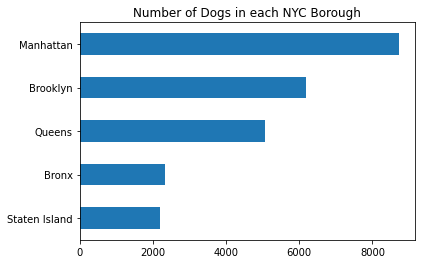

In [37]:
df_known.borough.value_counts().sort_values().plot(kind = 'barh')
plt.title('Number of Dogs in each NYC Borough')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [38]:
df_pop = pd.read_csv('boro_population.csv')

In [39]:
df_pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [40]:
dogs_total = df_known.borough.value_counts().to_frame(name = 'dog_count')
dogs_total

,dog_count
Manhattan,8717
Brooklyn,6183
Queens,5062
Bronx,2326
Staten Island,2202


In [41]:
df_dogcap = dogs_total.merge(df_pop, left_index= True, right_on='borough')
df_dogcap

,dog_count,borough,population,area_sqmi
0,8717,Manhattan,1644518,23
2,6183,Brooklyn,2636735,71
3,5062,Queens,2339150,109
1,2326,Bronx,1455444,42
4,2202,Staten Island,474558,59


In [42]:
df_dogcap['percapita'] = df_dogcap.dog_count/df_dogcap.population
df_dogcap

,dog_count,borough,population,area_sqmi,percapita
0,8717,Manhattan,1644518,23,0.005301
2,6183,Brooklyn,2636735,71,0.002345
3,5062,Queens,2339150,109,0.002164
1,2326,Bronx,1455444,42,0.001598
4,2202,Staten Island,474558,59,0.004640


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [43]:
breed_borough5 = pd.DataFrame(df_known.groupby('borough').primary_breed.value_counts().groupby(level = 0, group_keys = False).nlargest(5))

#to change column name use toFrame
breed_borough5 = df_known.groupby('borough').primary_breed.value_counts().groupby(level = 0, group_keys = False).nlargest(5).to_frame(name = 'counts').reset_index()

breed_borough5

#Reference: breed_borough5= df_known.groupby('borough').primary_breed.value_counts().groupby(level = 0, group_keys = False).nlargest(5).to_frame(name = 'counts').reset_index().set_index('borough')  <- will remove 0,1,2... and reset index as the borough

,borough,primary_breed,counts
0,Bronx,Yorkshire Terrier,249
1,Bronx,Shih Tzu,243
2,Bronx,Chihuahua,207
3,Bronx,American Pit Bull Terrier/Pit Bull,181
4,Bronx,Maltese,137
5,Brooklyn,Yorkshire Terrier,488
6,Brooklyn,Shih Tzu,473
7,Brooklyn,Chihuahua,384
8,Brooklyn,Labrador Retriever,255
9,Brooklyn,Maltese,247


In [44]:
# Several ways to approach this problem...see https://www.youtube.com/watch?v=O4538i9MQEc for reference
# pd.crosstab(breed_borough5['borough'], breed_borough5['primary_breed'])
# breed_borough5.groupby('borough').primary_breed.value_counts().unstack().plot(kind = 'bar')

In [45]:
#Each row is a summary - number of dogs of the breed in that part of the city
#Grouped bar charts require each category to be numeric...transformation required - breeds need to be individual columns

breed_borough5.pivot_table(index = 'borough', columns = 'primary_breed') #reshapes the data
# breed_borough5.pivot_table(index = 'borough', columns = 'primary_breed').plot(kind = 'bar') #all the counts in the legends...FIX!

counts                               \
primary_breed American Pit Bull Terrier/Pit Bull Chihuahua Labrador Retriever   
borough                                                                         
Bronx                                      181.0     207.0                NaN   
Brooklyn                                     NaN     384.0              255.0   
Manhattan                                    NaN     502.0              422.0   
Queens                                       NaN     302.0              208.0   
Staten Island                                NaN     100.0              120.0   

                                                  
primary_breed Maltese Shih Tzu Yorkshire Terrier  
borough                                           
Bronx           137.0    243.0             249.0  
Brooklyn        247.0    473.0             488.0  
Manhattan       320.0    447.0             497.0  
Queens          302.0    391.0             432.0  
Staten Island    92.0    163.0             169.0

Text(0, 0.5, 'Number of Dogs')

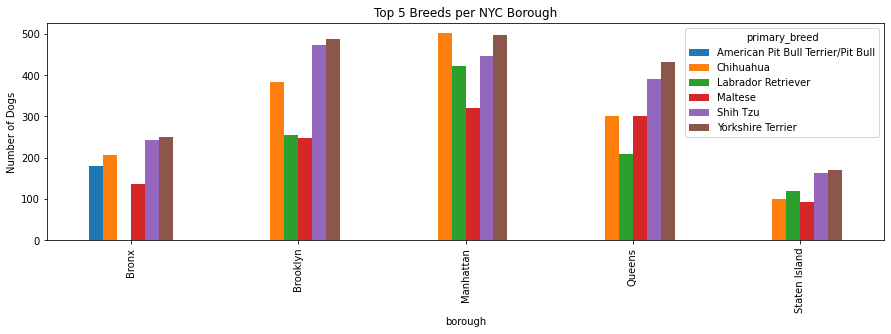

In [46]:
breed_borough5.pivot_table(index = 'borough', columns = 'primary_breed').plot(kind = 'bar', y = 'counts', figsize=(15, 4))
plt.title('Top 5 Breeds per NYC Borough')
plt.ylabel('Number of Dogs')

## What percentage of dogs are not guard dogs?

In [47]:
df_known['Guard or Trained'].value_counts(normalize = True)*100
(df_known['Guard or Trained'].value_counts(normalize = True)*100)['No']


99.95100040832993